In [33]:
import pandas as pd
import numpy as np
import random

In [38]:
image_names = pd.read_excel('/content/image_names.xlsx')

In [39]:
image_names.head(8)

,image_names
0,image1_pic1
1,image1_pic2
2,image1_pic3
3,image1_pic4
4,image1_pic5
5,image1_pic6
6,image2_pic1
7,image2_pic2


In [40]:
#first we will split the imagename into two columns
#first column will have the unique id and the second one will have different subset names


image_df = image_names['image_names'].str.split('_', expand=True)
image_df.columns = ['id', 'suffix']
image_df['image_names'] = image_names['image_names']

image_df.head()

,id,suffix,image_names
0,image1,pic1,image1_pic1
1,image1,pic2,image1_pic2
2,image1,pic3,image1_pic3
3,image1,pic4,image1_pic4
4,image1,pic5,image1_pic5


In [41]:
unique_id = image_df['id'].unique()

print('List of unique ids:', unique_id)

List of unique ids: ['image1' 'image2' 'image3' 'image4' 'image5' 'image6' 'image7' 'image8'
 'image9' 'image10' 'image11' 'image12' 'image13' 'image14' 'image15']


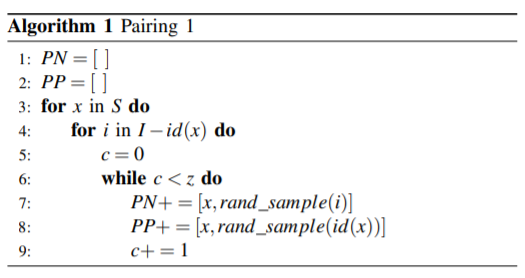

In [66]:
#entire training sample set is 'S' and totally I identities
#id(x), will return the samples corresponding to same identity
#rand_sample, corresponding to the random sample of the identities

#for our scenario, let's fix z=3
#For this algorithm, it generates pairs based on individual samples versus every other subject
#if z is greater than the actual number of samples within identify, repeated pairs could be possible
#let's consider z as 3

PN = []
PP = []

#first we need to create an array that consists of unique imageids
for i, row in image_df.iterrows():
  id = row['id']
  sample = row['image_names']
  #we need to create two list now
  remaining_id = unique_id[unique_id != id]

  #spin through the remaining_id to get the combinations
  for j in remaining_id:
    pos_pair = list(image_df[image_df['id'] == id]['suffix'])
    neg_pair = list(image_df[image_df['id'] == j]['suffix'])

    pos = random.sample(pos_pair, 3)
    neg = random.sample(neg_pair,3) 
 
    #now prefix each value with the image identity and form the pairs
    pp_sub = [sample+','+id+ '_' + x for x in pos]
    pn_sub = [sample+','+j+ '_' + x for x in neg]

    PP.extend(pp_sub)
    PN.extend(pn_sub)

In [69]:
print('length of the positive pairs:', len(PP))
print('length of the negative pairs:', len(PN))

length of the positive pairs: 3822
length of the negative pairs: 3822


In [71]:
#lets display some samples from the positive pairs and negative pairs

print('sample pairs from positive:', PP[:5])
print('sample pairs from negative:', PN[:5])

sample pairs from positive: ['image1_pic1,image1_pic4', 'image1_pic1,image1_pic6', 'image1_pic1,image1_pic1', 'image1_pic1,image1_pic3', 'image1_pic1,image1_pic4']
sample pairs from negative: ['image1_pic1,image2_pic1', 'image1_pic1,image2_pic2', 'image1_pic1,image2_pic3', 'image1_pic1,image3_pic2', 'image1_pic1,image3_pic7']


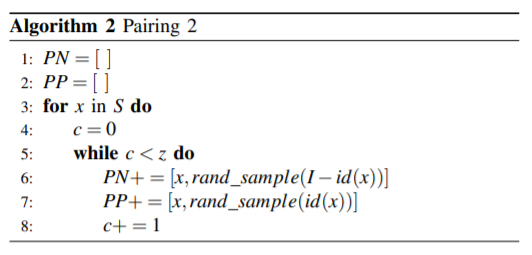

In [72]:
#the second approach gives less number of output pairs, as we have skipped one loop
#here each sample is compared with other samples as bulk and not at individual level

In [73]:
PN = []
PP = []

#first we need to create an array that consists of unique imageids
for i, row in image_df.iterrows():
  id = row['id']
  sample = row['image_names']
  #we need to create two list now
  remaining_id = unique_id[unique_id != id]  
  
  pos_pair = list(image_df[image_df['id'] == id]['suffix'])
  neg_pair = list(image_df[image_df['id'].isin(remaining_id)]['image_names'])

  pos = random.sample(pos_pair, 3)
  neg = random.sample(neg_pair,3) 
 
  #now prefix each value with the image identity and form the pairs
  pp_sub = [sample+','+id+ '_' + x for x in pos]
  pn_sub = [sample+','+ x for x in neg]

  PP.extend(pp_sub)
  PN.extend(pn_sub)

In [76]:
print('length of the positive pairs:', len(PP))
print('length of the negative pairs:', len(PN))

length of the positive pairs: 273
length of the negative pairs: 273


In [77]:
#lets display some samples from the positive pairs and negative pairs

print('sample pairs from positive:', PP[:5])
print('sample pairs from negative:', PN[:5])

sample pairs from positive: ['image1_pic1,image1_pic1', 'image1_pic1,image1_pic6', 'image1_pic1,image1_pic2', 'image1_pic2,image1_pic1', 'image1_pic2,image1_pic2']
sample pairs from negative: ['image1_pic1,image10_pic3', 'image1_pic1,image3_pic6', 'image1_pic1,image14_pic2', 'image1_pic2,image13_pic1', 'image1_pic2,image12_pic4']
